In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
#Obtain Data

data_full = pd.read_csv('/Users/aminasaleh/Downloads/water_potability.csv')

In [4]:
#Clean up Data

data_full = data_full.dropna()

In [5]:
#Create Training and Test Set

x = data_full.drop(columns = ['Potability']).copy()
y = data_full ['Potability']
scaler = MinMaxScaler()
X = scaler.fit_transform(data_full)
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

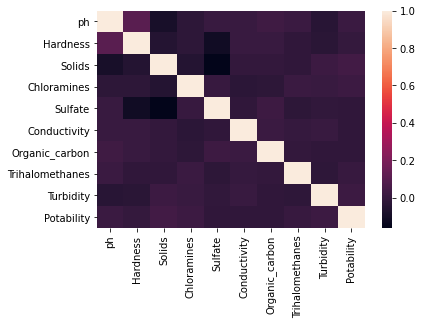

In [6]:
#Correlation Matrix

waterpot_hm = sns.heatmap(data_full.corr(), annot = False)

In [7]:
#Build the Model 

knn = KNeighborsClassifier(n_neighbors=2)

In [8]:
#Fit the Model

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [9]:
#Train the Model

predictions_train = knn.predict(x_train)
predictions_test = knn.predict(x_test)

[[207  24]
 [143  29]]
              precision    recall  f1-score   support

           0       0.59      0.90      0.71       231
           1       0.55      0.17      0.26       172

    accuracy                           0.59       403
   macro avg       0.57      0.53      0.49       403
weighted avg       0.57      0.59      0.52       403



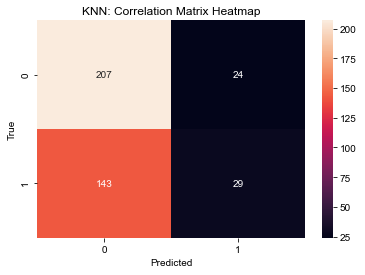

In [10]:
#Create Confusion Matrix

conf_mat = confusion_matrix(y_test, predictions_test)
heatmap = sns.heatmap(conf_mat, annot=True, fmt='.0f')

sns.set(font_scale=1.2)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette("pastel")
plt.title('KNN: Correlation Matrix Heatmap')

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('True')


print(metrics.confusion_matrix(y_test, predictions_test))
print(metrics.classification_report(y_test, predictions_test))

In [11]:
#Determine Accuracy 

print("Accuracy:",metrics.accuracy_score(y_train, predictions_train))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_test))

Accuracy: 0.7549751243781094
Accuracy: 0.5856079404466501
